In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [2]:
import numpy as np

In [3]:
from PIL import Image

In [4]:
dataset_path = 'C:\\Users\\manis\\OneDrive\\Desktop\\Data Science Plan\\Major Project\\balanced_ds'

### Random Inspection of each class

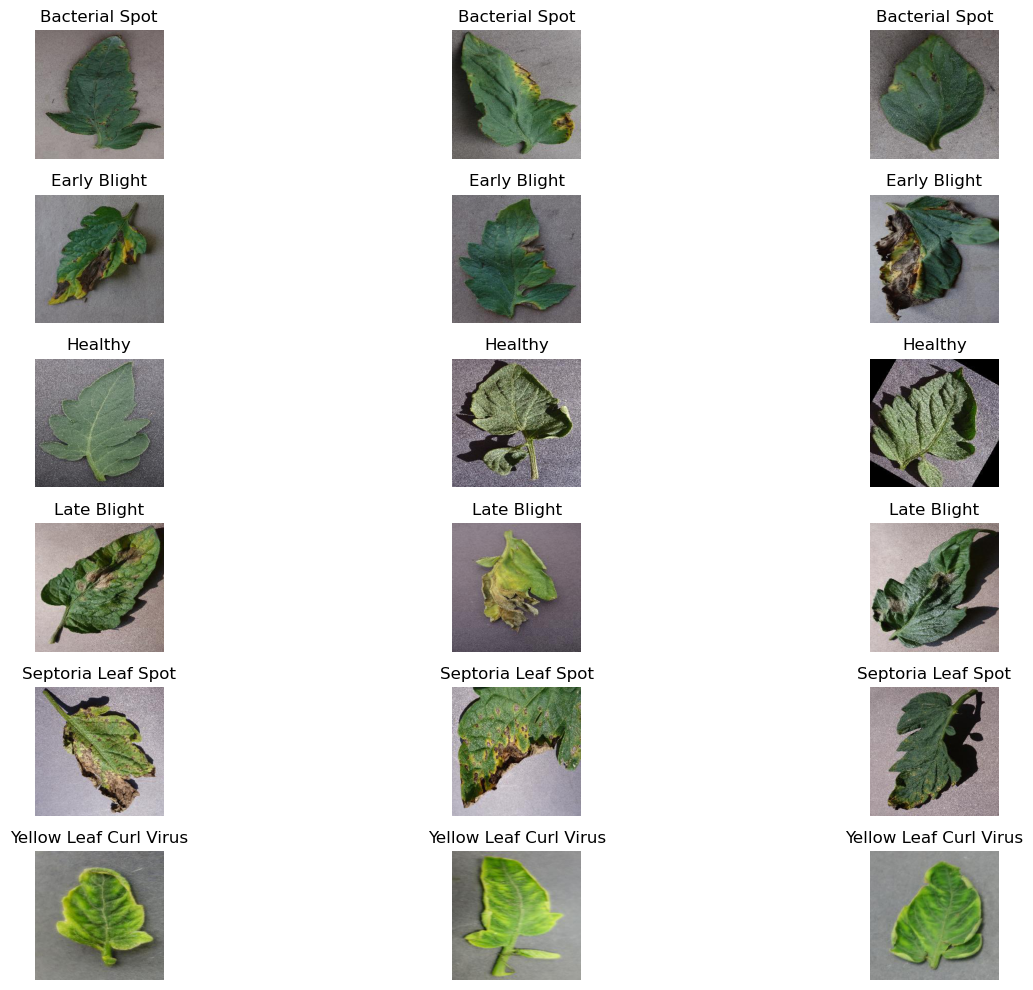

In [5]:
##Randomly displaying images for each class to inspect any visual features..
def display_random_images(dataset_path, num_samples=1):
    # Get list of all classes (sub-folders)
    classes = os.listdir(dataset_path)
    
    plt.figure(figsize=(15, 10))
    
    for i, disease_class in enumerate(classes):
        # Path to each disease class folder
        class_folder = os.path.join(dataset_path, disease_class)
        
        # Get list of images in the folder
        images = os.listdir(class_folder)
        
        # Randomly select an image
        for j in range(num_samples):
            random_image = random.choice(images)
            img_path = os.path.join(class_folder, random_image)
            
            # Load and display the image
            img = mpimg.imread(img_path)
            plt.subplot(len(classes), num_samples, i * num_samples + j + 1)
            plt.imshow(img)
            plt.title(disease_class)
            plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to display random images from each class
display_random_images(dataset_path, num_samples=3) 

1. The yellow leaf curl virus images do look more blurry compared to the others. The leafs are more yellowish and are curled on the edges
2. The camera lighting seems to be a problem with other images, with too much light reflecting.
3. Healthy leaves look healthy without any spots or texture.
4. septoria leaf spot has little brown spots all over the leaf with yellowish discoloration
5. More Browning on Large part of leaf in early blight, with yellwoing in the background
6. For late blight the leaves are ashy/ lack chlorophyll in large part or browning.
7. Bacterial spot is brown spotting near /on the edges of the leaves.

But overall healthy and yellow leaf curl virus have more distinct features and other classes are harder to classify 

### Mean and standard deviation images per class

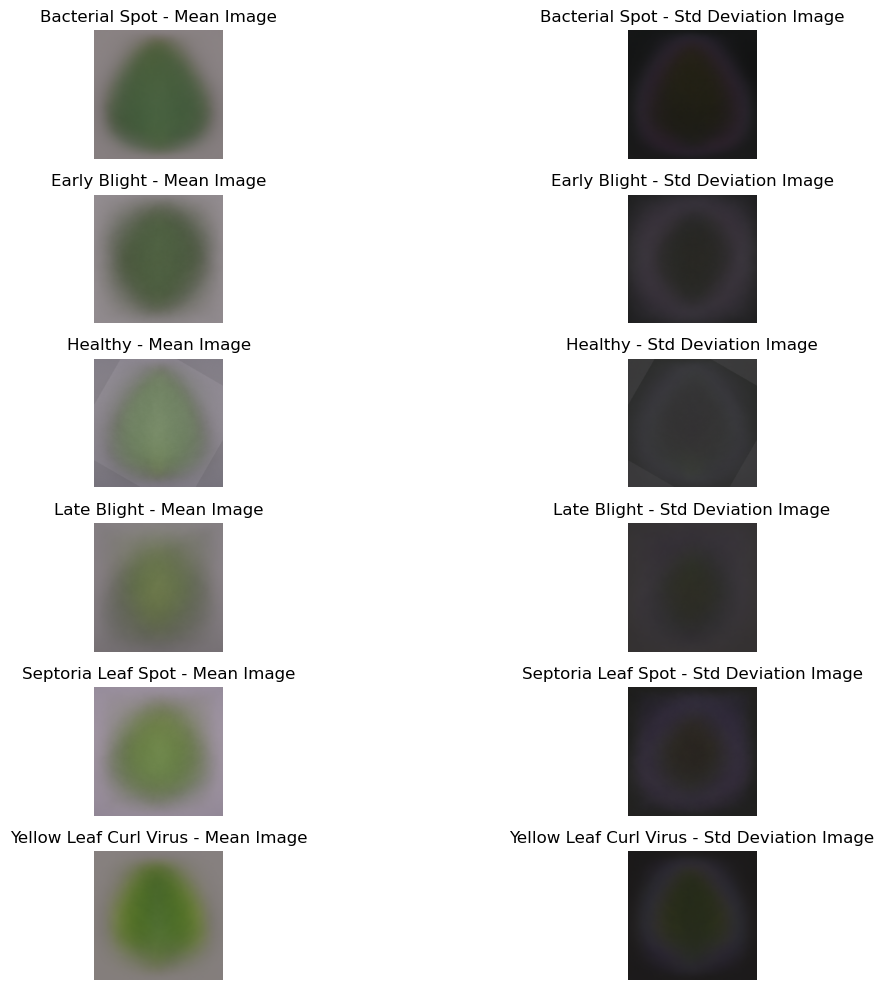

In [15]:
image_size = (256, 256)
def compute_mean_std_images(class_folder):
    images = []
    
    # Load and resize images
    for img_name in os.listdir(class_folder):
        img_path = os.path.join(class_folder, img_name)
        img = Image.open(img_path).convert('RGB')
        img = img.resize(image_size)
        img_array = np.array(img)
        
        images.append(img_array)
    
    # Stack all images and compute mean and std along the stack axis
    images_stack = np.stack(images, axis=0)
    mean_image = np.mean(images_stack, axis=0)
    std_image = np.std(images_stack, axis=0)
    
    return mean_image, std_image

# Function to display mean and std images for each class
def display_mean_std_images(dataset_path):
    classes = os.listdir(dataset_path)
    plt.figure(figsize=(15, 10))
    
    for i, disease_class in enumerate(classes):
        class_folder = os.path.join(dataset_path, disease_class)
        
        # Compute mean and standard deviation images for the class
        mean_img, std_img = compute_mean_std_images(class_folder)
        
        # Display mean image
        plt.subplot(len(classes), 2, 2 * i + 1)
        plt.imshow(mean_img.astype('uint8'))
        plt.title(f'{disease_class} - Mean Image')
        plt.axis('off')
        
        # Display standard deviation image
        plt.subplot(len(classes), 2, 2 * i + 2)
        plt.imshow(std_img.astype('uint8'))
        plt.title(f'{disease_class} - Std Deviation Image')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# Call the function to display mean and std images for each class
display_mean_std_images(dataset_path)

This does not really show aything specific to each disease/ class. The conclusion can be made that when all the images specific to the class are stacked on each other to caluclate the pixel wise mean and std. It can be noted that the shape of the leaf is maintained.
The yellow leaf curl virus does show the yellowing in the edges.
The standard deviation displays that variation in the color. High standrd devaition indicates brighter color which means sudden change in the color(which could be disease) and low standard deviation means darker color no specific change in colour. In this experiment we cannot really capture anything related to standard devaition of images.

### PCA

In [6]:
from sklearn.decomposition import PCA

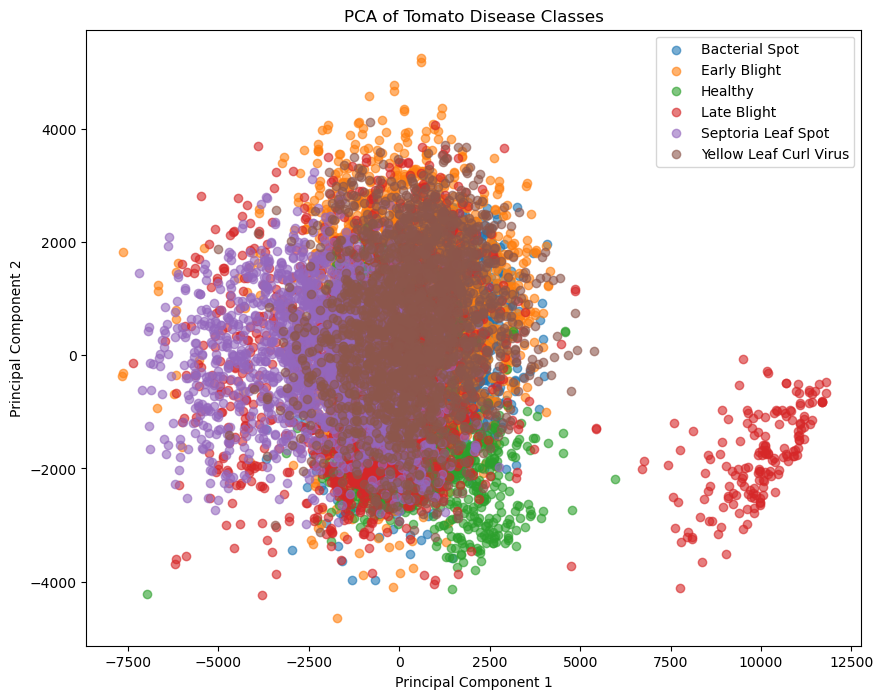

In [7]:
image_size = (64, 64)

# Function to load images and create a feature matrix
def load_images_as_features(dataset_path):
    features = []
    labels = []
    
    # Iterate over each class folder
    for disease_class in os.listdir(dataset_path):
        class_folder = os.path.join(dataset_path, disease_class)
        
        # Iterate over each image in the class folder
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            img = Image.open(img_path).convert('RGB')
            img = img.resize(image_size)  # Resize to (64, 64)
            
            # Flatten the image from 2d to 1d the flattened image is in the features list and its corresponding label is in label list
            img_array = np.array(img).flatten()
            features.append(img_array)
            labels.append(disease_class)
    
    # Convert lists to numpy arrays
    features = np.array(features)
    labels = np.array(labels)
    return features, labels

# Load the images and labels
features, labels = load_images_as_features(dataset_path)

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Plot the PCA results
plt.figure(figsize=(10, 8))
for label in np.unique(labels):
    idx = labels == label
    plt.scatter(features_pca[idx, 0], features_pca[idx, 1], label=label, alpha=0.6)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Tomato Disease Classes')
plt.legend()
plt.show()

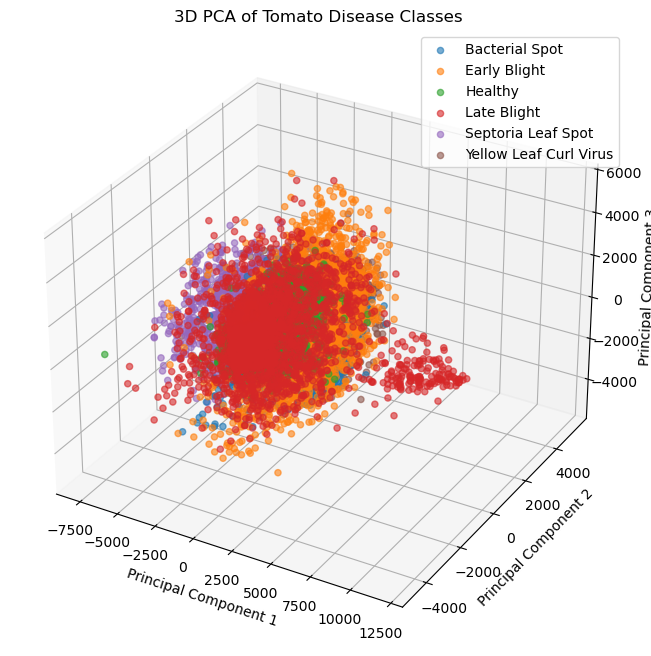

In [8]:
from mpl_toolkits.mplot3d import Axes3D

# Apply PCA with 3 components
pca = PCA(n_components=3)
features_pca_3d = pca.fit_transform(features)

# Plot in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
for label in np.unique(labels):
    idx = labels == label
    ax.scatter(features_pca_3d[idx, 0], features_pca_3d[idx, 1], features_pca_3d[idx, 2], label=label, alpha=0.6)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Tomato Disease Classes')
plt.legend()
plt.show()

There is an overlapping in the classes, it means the distinguished features are less obvious. More sophisticated feature extraction techniques will be required.
PCA has reduced the dimensionality of the image dataset, to make it easier ti understand. IF Through PCA we saw some distinct clusters then it would have been enough with normal feature extraction methods to identify the difference and classify.

### Exploring PCA further for feature Importance..

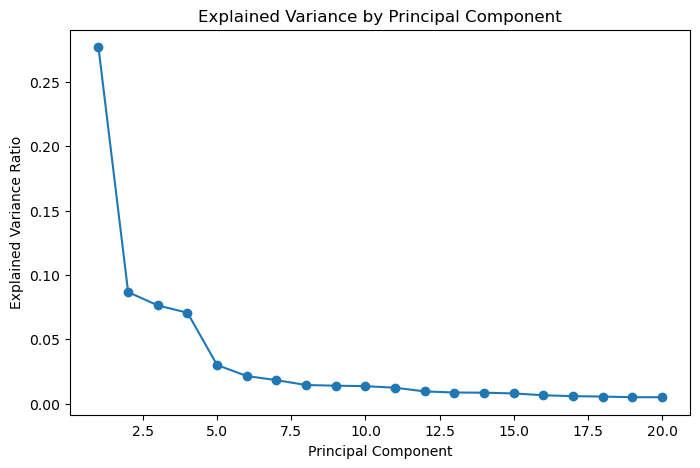

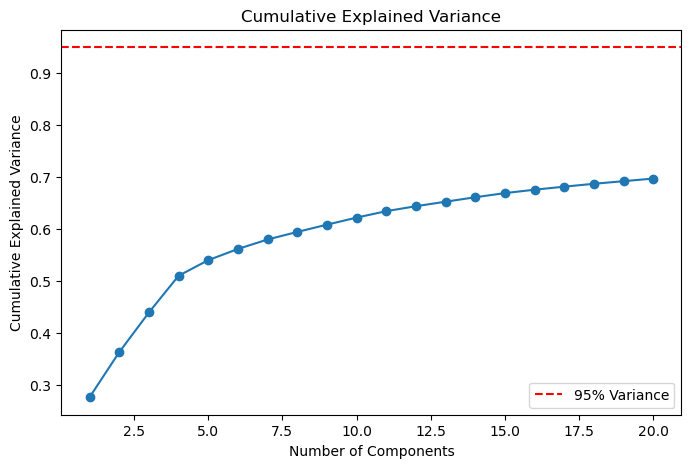

In [20]:
pca = PCA(n_components=20)  # Start with more components than needed to see decay
pca.fit(features)

# Plot the explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Component')
plt.show()

# Cumulative variance to decide how many components to retain
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.show()

#### Interpretation
The graph for feature importance states that 30% of varinace from the dataset was captured by PC1 followed by 8% then further decreases to 7%
We can see the cumulative variance captured by 20 PC is around 68%. That is a lot of Principal components 

In [21]:
# Get the loading scores (i.e., weights) for each feature in each component
components = pca.components_

# Let's focus on the first component (most important)
first_component = components[0]

# Identify the top 10 pixels (features) with the highest absolute weight in the first component
top_pixels = np.argsort(np.abs(first_component))[-10:]  # Top 10 highest weights

print("Top 10 features (pixels) for the first principal component:", top_pixels)
print("Feature weights:", first_component[top_pixels])

Top 10 features (pixels) for the first principal component: [3080 3266 3272 3269 3458 3650 4034 3653 3842 3461]
Feature weights: [0.01042335 0.01043727 0.01045218 0.01046987 0.01050564 0.01051696
 0.01052057 0.0105297  0.01053051 0.01053125]


The highest variance is captured by the first PC and top 10 of the weights of the first PC is captured.
The corresponding pixels of those weights were also captured 

In [29]:
important_features = first_component.reshape(image_size)
plt.figure(figsize=(6, 6))
sns.heatmap(important_features, cmap='coolwarm')
plt.title('Importance of Pixels in First Principal Component')
plt.axis('off')
plt.show()

ValueError: cannot reshape array of size 12288 into shape (64,64)

The error occurs because the size of first_component (which is 12288 elements in this example) does not match the target shape (64, 64).
This mismatch is because when the images were flattened, they likely had a shape of (64, 64, 3) for RGB channels, which results in 64 * 64 * 3 = 12288 elements per image. To visualize the important features correctly, you need to reshape the weights to (64, 64, 3) rather than (64, 64).

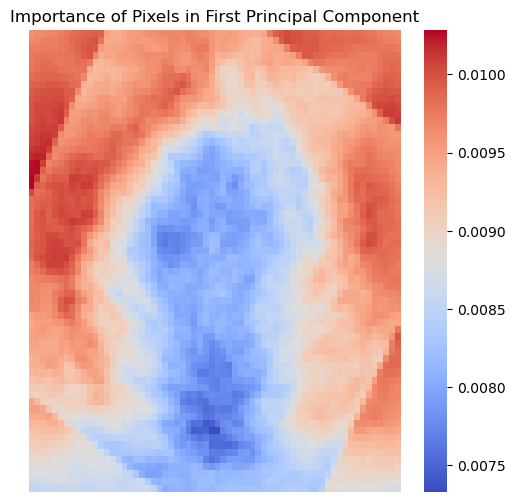

In [23]:
# Reshape the weights to (64, 64, 3) for RGB channels
important_features = first_component.reshape((64, 64, 3))

# Take the mean across the color channels to get a 2D representation
important_features_mean = important_features.mean(axis=2)

# Plot the heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(important_features_mean, cmap='coolwarm')
plt.title('Importance of Pixels in First Principal Component')
plt.axis('off')
plt.show()

This heatmap shows which parts of the image (e.g., specific areas or edges of the leaf) contribute most to the first principal component, potentially indicating important visual features like textures or edges related to disease symptoms.

The dark blue and dark red mostly contribute (in terms of variance) in Principal Component1 . The lighter colors have little to no effect. The warmer colour shows positive contribution (high values) and the cooler colour shows negative contribution (low values).
This shows that the central and peripheral region of the leaf have significant contributors 

### Traning Random Forest on important features extracted by the PCA

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Reduce dimensionality of features
pca = PCA(n_components=10)  # Use the number of components that explains most variance
features_pca = pca.fit_transform(features)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_pca, labels, test_size=0.3, random_state=42)

# Train a classifier (Random Forest in this case)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy with PCA features:", accuracy)

Model Accuracy with PCA features: 0.7334933973589436


PCA is being used to extract the most important features from the images by reducing their dimensionality, and then these reduced features are used to train a Random Forest classifier.

In [34]:
print(features_pca)

[[-1614.11237126  -375.40480419  -725.0539595  ...   761.39902108
     85.92713749  -271.21697323]
 [-1077.35275204   360.23379502  1503.25805377 ...  -749.27567218
    443.81543045  -662.56203904]
 [ -163.83411679  1249.08274375  1379.65801134 ...   -97.13931866
    411.62867918    -6.62288375]
 ...
 [-3991.92278491  -185.79524322   230.77712544 ...   146.07849221
   -560.41426441   185.77407671]
 [-2681.45944908  1758.83878943   229.75051684 ...   253.47705913
    193.94805796 -1124.54405029]
 [-1293.03798247 -2595.54306272 -1105.1555388  ...  -752.39121264
   -174.58513782   -15.1563832 ]]


### Explanation
1. Each image is originally represented as a high-dimensional vector (for instance, if the images are resized to 
64×64×3 each image has 12,288 pixel values).
2. PCA reduces this high-dimensional representation down to a smaller number of components (in this case, 10), capturing the directions of maximum variance in the data.
3. The result of pca.fit_transform(features) is a new, lower-dimensional dataset (features_pca) where each image is represented by a vector of only 10 values (the 10 principal components).